In [1]:
import numpy as np
from matplotlib import pyplot as plt
from kafe2 import  XYContainer, Fit, XYFit, Plot, ContoursProfiler                            
import PhyPraKit as ppk
from scipy.signal import find_peaks
from uncertainties import ufloat, unumpy
from math import log10, floor
import scipy.integrate as integrate

Welcome to JupyROOT 6.24/06


In [2]:
data = np.genfromtxt( "Aufgabe1.1.txt", #Daten einlesen
                      skip_header=3)
r = data[:,0]     # Daten Variablen zuweisen
l1 = data[:,1]     
l2 = data[:,2]
l3 = data[:,3]

In [3]:
print(l1)

[125. 120. 107. 104.  55.  45.]


In [4]:
l1=l1-18
l2=l2-18
l3=l3-18
print(l1,l2,l3)

[107. 102.  89.  86.  37.  27.] [102.  67.  47.  32.  24.  17.] [59. 36. 24. 21. 17. 12.]


In [5]:
a=[.1,.2,.3]
r0=[l1[0],l2[0],l3[0]]
r1=[l1[1],l2[1],l3[1]]
r2=[l1[2],l2[2],l3[2]]
r3=[l1[3],l2[3],l3[3]]
r4=[l1[4],l2[4],l3[4]]
r5=[l1[5],l2[5],l3[5]]
print(a,r0,r1,r2,r3,r4,r5)

[0.1, 0.2, 0.3] [107.0, 102.0, 59.0] [102.0, 67.0, 36.0] [89.0, 47.0, 24.0] [86.0, 32.0, 21.0] [37.0, 24.0, 17.0] [27.0, 17.0, 12.0]


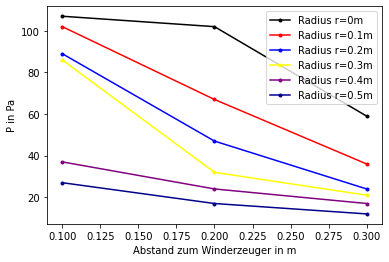

In [6]:
plt.plot(a,r0,label='Radius r=0m',color='black',marker='.')
plt.plot(a,r1,label='Radius r=0.1m',color='red',marker='.')
plt.plot(a,r2,label='Radius r=0.2m',color='blue',marker='.')
plt.plot(a,r3,label='Radius r=0.3m',color='yellow',marker='.')
plt.plot(a,r4,label='Radius r=0.4m',color='purple',marker='.')
plt.plot(a,r5,label='Radius r=0.5m',color='darkblue',marker='.')
plt.legend(loc='best')
plt.xlabel('Abstand zum Winderzeuger in m')
plt.ylabel('P in Pa')
plt.savefig('Aufgabe1_1.png')
plt.show()

In [7]:
#1.2
data = np.genfromtxt( "Aufgabe1.2.txt", #Daten einlesen
                      skip_header=3)
U = data[:,0]     # Daten Variablen zuweisen
P = data[:,1]     

In [20]:
P=P-18
print(P)
print(U)
xy_data = XYContainer(U,P)
print(xy_data)

[-54. -50. -44. -37. -30. -20. -11.   2.  13.  28.  43.]
[ 600.  800. 1000. 1200. 1400. 1600. 1800. 2000. 2200. 2400. 2600.]


In [21]:
def quad(x,a=0,c=0):
    return a*x^2 


line_fit=Fit(data=xy_data,model_function=quad)
line_fit.do_fit()
#line_fit.assign_parameter_names(x='r', a='a', b='U/I^2')
#line_fit.assign_model_function_expression('B')
#line_fit.assign_model_function_expression("{a} * {x} ")
line_fit.report()

#line_fit.assign_parameter_latex_names(x='r', a='a', b='\frac{U}{I^2}')
#line_fit.assign_model_function_latex_name('\frac{U}{I^2}')
#line_fit.assign_model_function_latex_expression('{a} \\cdot {x}')


line_fit.data_container.label = "Verwendete Daten"
line_fit.model_label = "Modellfunktion"

line_fit.data_container.axis_labels = [ "c^2/2*r^2 in N*m/A^2","U/I^2 in V/A^2"]

plot = Plot(fit_objects=line_fit)
plot.plot()
plot.show()
plot.save()
print(xy_data)

TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''